# Load Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dhivyeshrk/diseases-and-symptoms-dataset")

print("Path to dataset files:", path)

FINAL_DATASET_CSV = f"{path}/Final_Augmented_dataset_Diseases_and_Symptoms.csv"

Path to dataset files: C:\Users\ASUS\.cache\kagglehub\datasets\dhivyeshrk\diseases-and-symptoms-dataset\versions\1


In [4]:
import pandas as pd

df1 = pd.read_csv(FINAL_DATASET_CSV)

In [5]:
df1.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# check for dataset size
print(f"Number of row: {df1.shape[0]}")
print(f"Number of column: {df1.shape[1]}")

Number of row: 246945
Number of column: 378


# Preparing the Data

## Filter all internal disease

In [9]:
# filtered using LLM

internal_diseases = [
    'panic disorder', 'turner syndrome', 'cryptorchidism',
    'poisoning due to ethylene glycol', 'atrophic vaginitis',
    'metabolic disorder', 'sick sinus syndrome', 'glaucoma',
    'eating disorder', 'transient ischemic attack',
    'pyelonephritis', 'chronic pain disorder', 'liver cancer',
    'atelectasis', 'choledocholithiasis', 'cirrhosis',
    'thoracic aortic aneurysm', 'subdural hemorrhage',
    'diabetic retinopathy', 'fibromyalgia',
    'ischemia of the bowel', 'fetal alcohol syndrome',
    'peritonitis', 'acute pancreatitis', 'thrombophlebitis',
    'asthma', 'emphysema', 'cysticercosis',
    'infectious gastroenteritis', 'substance-related mental disorder',
    'coronary atherosclerosis', 'pituitary adenoma',
    'idiopathic nonmenstrual bleeding', 'ovarian torsion',
    'retinopathy due to high blood pressure', 'pulmonary eosinophilia',
    'foreign body in the gastrointestinal tract', 'endophthalmitis',
    'intestinal malabsorption', 'stroke',
    'normal pressure hydrocephalus', 'hashimoto thyroiditis',
    'nonalcoholic liver disease (NASH)', 'coagulation (bleeding) disorder',
    'intracranial hemorrhage', 'hyperkalemia', 'abscess of the lung',
    'dengue fever', 'volvulus', 'atrial fibrillation',
    'pinworm infection', 'achalasia', 'abdominal hernia',
    'cryptococcosis', 'obesity', 'indigestion',
    'esophageal cancer', 'pulmonary congestion', 'tuberous sclerosis',
    'empyema', 'neonatal jaundice',
    'chronic obstructive pulmonary disease (COPD)',
    'deep vein thrombosis (DVT)', 'protein deficiency',
    'von willebrand disease', 'heart block', 'colonic polyp',
    'magnesium deficiency', 'female infertility of unknown cause',
    'pericarditis', 'pulmonic valve disease',
    'cranial nerve palsy', 'hypothyroidism',
    'vitamin b12 deficiency', 'diabetes', 'vulvodynia',
    'endometriosis', 'vasculitis', 'chronic kidney disease',
    'bladder disorder', 'chorioretinitis', 'priapism',
    'myositis', 'mononucleosis', 'neuralgia',
    'polycystic kidney disease', 'amyloidosis',
    'chronic inflammatory demyelinating polyneuropathy (CIDP)',
    'gastroesophageal reflux disease (GERD)', 'vitreous hemorrhage',
    'scleroderma', 'myasthenia gravis', 'hypoglycemia', 'idiopathic absence of menstruation',
    'pemphigus', 'peyronie disease', 'hiatal hernia', 'extrapyramidal effect of drugs',
    'meniere disease', 'hirschsprung disease', 'polymyalgia rheumatica', 'lymphedema',
    'bladder cancer', 'acute bronchospasm', 'acute glaucoma', 'hypercalcemia', 'stress incontinence',
    'varicose veins', 'benign kidney cyst', 'hydrocele of the testicle', 'hydronephrosis',
    'diverticulosis', 'huntington disease', 'lymphoma', 'anemia due to chronic kidney disease',
    'injury to internal organ', 'syndrome of inappropriate secretion of adh (siadh)',
    'hepatic encephalopathy',
    'bone cancer', 'syringomyelia', 'pulmonary fibrosis', 'mitral valve disease', 'parkinson disease',
    'gout', 'myelodysplastic syndrome', 'acute kidney injury', 'threatened pregnancy',
    'intracranial abscess', 'gastrointestinal hemorrhage', 'drug abuse (opioids)',
    'drug abuse (methamphetamine)', 'poisoning due to antihypertensives', 'scurvy', 'narcolepsy',
    'anxiety', 'impulse control disorder', 'leukemia', 'adrenal cancer', 'thyroid disease',
    'hypocalcemia', 'macular degeneration', 'pneumonia', 'premature ventricular contractions (pvcs)',
    'testicular cancer', 'hydrocephalus', 'breast cancer', 'anemia due to malignancy',
    'esophageal varices', 'endometrial cancer', 'cystic fibrosis', 'parathyroid adenoma',
    'glucocorticoid deficiency', 'wilson disease', 'vesicoureteral reflux', 'vitamin a deficiency',
    'hepatitis due to a toxin', 'hypergammaglobulinemia', 'pituitary disorder', 'kidney stone',
    'chronic glaucoma', 'aplastic anemia', 'hemolytic anemia', 'diabetic kidney disease',
    'hypercholesterolemia', 'kidney failure', 'hemophilia', 'hyperosmotic hyperketotic state',
    'gastroparesis', 'polycythemia vera', 'thrombocytopenia', 'head and neck cancer',
    'pseudohypoparathyroidism', 'goiter', 'muscular dystrophy', 'anemia of chronic disease',
    'glucocorticoid deficiency', 'wilson disease', 'vesicoureteral reflux', 'vitamin a deficiency',
    'hepatitis due to a toxin', 'hypergammaglobulinemia', 'pituitary disorder', 'kidney stone',
    'chronic glaucoma', 'aplastic anemia', 'hemolytic anemia', 'diabetic kidney disease',
    'hypercholesterolemia', 'kidney failure', 'hemophilia', 'hyperosmotic hyperketotic state',
    'gastroparesis', 'polycythemia vera', 'thrombocytopenia', 'head and neck cancer',
    'pseudohypoparathyroidism', 'goiter', 'muscular dystrophy', 'anemia of chronic disease',
    'dysthymic disorder', 'hypertensive heart disease', 'polycystic ovarian syndrome (pcos)',
    'encephalitis', 'premature atrial contractions (pacs)', 'hemiplegia', 'meningioma',
    'brain cancer', 'placental abruption', 'lung cancer', 'primary kidney disease',
    'uterine cancer', 'sarcoidosis', 'metastatic cancer', 'hemochromatosis',
    'cushing syndrome', 'subacute thyroiditis', 'intracerebral hemorrhage',
    'alzheimer disease', 'systemic lupus erythematosis (sle)', 'premature ovarian failure',
    'crohn disease', 'fluid overload', 'atrial flutter', 'heart attack',
    'primary thrombocythemia', 'osteoporosis', 'sickle cell crisis',
    'tricuspid valve disease', 'vitamin d deficiency', 'tuberculosis', 'dementia',
    'obstructive sleep apnea (osa)', 'intussusception', 'hypokalemia',
    'congenital heart defect', 'connective tissue disorder', 'primary immunodeficiency',
    'ovarian cancer', 'intestinal disease', 'myocarditis', 'ischemic heart disease',
    'pancreatic cancer', 'kidney disease due to longstanding hypertension',
    'toxic multinodular goiter', 'anemia', 'iron deficiency anemia',
    'acute respiratory distress syndrome (ards)', 'wernicke korsakoff syndrome',
    'amyotrophic lateral sclerosis (als)', 'central retinal artery or vein occlusion',
    'paroxysmal supraventricular tachycardia', 'venous insufficiency',
    'diabetes insipidus', 'iridocyclitis', 'pulmonary hypertension',
    'thyroid nodule', 'dumping syndrome', 'lymphadenitis',
    'rheumatoid arthritis', 'diabetic peripheral neuropathy',
    'gestational diabetes', 'valley fever', 'lewy body dementia',
    'multiple myeloma', 'ascending cholangitis', 'interstitial lung disease',
    'mononeuritis', 'malaria', 'hypovolemia', 'endocarditis',
    'sepsis','cholecystitis', 'cardiac arrest', 'cardiomyopathy',
    'meningitis', 'spherocytosis', 'hormone disorder',
    'raynaud disease', 'reactive arthritis', 'hypertension of pregnancy',
    'peripheral arterial embolism', 'kidney cancer', 'vulvar cancer',
    'celiac disease', 'cystitis', 'sickle cell anemia',
    'pelvic inflammatory disease', 'liver disease', 'thyroid cancer',
    'friedrich ataxia', 'adrenal adenoma', 'esophagitis',
    'gas gangrene', 'spina bifida', 'alcoholic liver disease',
    'malignant hypertension', 'diverticulitis', 'moyamoya disease',
    'pneumothorax', 'human immunodeficiency virus infection (hiv)',
    'mumps', 'subarachnoid hemorrhage',
    'acute fatty liver of pregnancy (aflp)', 'lactose intolerance',
    'appendicitis', 'graves disease', 'thalassemia',
    'placenta previa', 'epidural hemorrhage', 'septic arthritis',
    'histoplasmosis', 'erythema multiforme',
    'prostate cancer', 'cerebral edema',
    'chronic pancreatitis', 'carcinoid syndrome',
    'hyperlipidemia', 'ulcerative colitis',
    'g6pd enzyme deficiency', 'diabetic ketoacidosis',
    'soft tissue sarcoma', 'bone disorder',
    'epilepsy', 'sjogren syndrome', 'avascular necrosis',
    'viral hepatitis', 'gastritis', 'intestinal cancer',
    'developmental disability', 'delirium',
    'peripheral arterial disease', 'heart failure',
    'pulmonary embolism', 'conduct disorder',
    'benign vaginal discharge (leukorrhea)', 'bladder obstruction',
    'melanoma', 'cervical disorder',
    'dyshidrosis', 'poisoning due to opioids',
    'lichen planus', 'gastroduodenal ulcer',
    'asperger syndrome', 'white blood cell disease',
    'kaposi sarcoma', 'pseudotumor cerebri']

In [10]:
print(f"Total internal disease: {len(internal_diseases)}/{df1.diseases.nunique()}")

Total internal disease: 346/773


In [11]:
# filtered all internal diseases in df1
filtered_df1 = df1[df1['diseases'].isin(internal_diseases)]

## Remove column that contain all zero values

In [12]:
# remove column where all the value is zero
zero_columns = filtered_df1.columns[(filtered_df1 == 0).all()]
filtered_df1 = filtered_df1.drop(columns=zero_columns)

## Check for disease frequency in the data

In [13]:
# check for the frequency of each category in the data
category_counts = filtered_df1['diseases'].value_counts()
for category in category_counts.index:
    count = category_counts[category]
    print(category, count)

cystitis 1219
vulvodynia 1218
esophagitis 1215
hypoglycemia 1215
gastrointestinal hemorrhage 1214
diverticulitis 1214
infectious gastroenteritis 1212
pneumonia 1212
gout 1211
liver disease 1209
acute pancreatitis 1207
cholecystitis 1204
anxiety 1198
obstructive sleep apnea (osa) 1196
sickle cell crisis 913
developmental disability 911
panic disorder 909
sepsis 909
macular degeneration 909
acute kidney injury 908
heart attack 907
hiatal hernia 906
acute bronchospasm 906
threatened pregnancy 905
kidney stone 904
asthma 904
heart failure 903
pyelonephritis 903
appendicitis 903
hypertensive heart disease 902
pelvic inflammatory disease 900
ischemic heart disease 886
pulmonary embolism 880
neuralgia 684
gastroduodenal ulcer 683
iron deficiency anemia 683
benign vaginal discharge (leukorrhea) 682
conduct disorder 679
gastritis 679
rheumatoid arthritis 678
chronic pain disorder 677
mononeuritis 676
diverticulosis 673
diabetic ketoacidosis 673
chronic glaucoma 668
hyperkalemia 657
fibromyalgia

## Encode the target variable (y)

In [14]:
from sklearn.preprocessing import LabelEncoder

# encode the target variable (y) with label encoder (current value is categorical, label encoder map the value to integer)
y = filtered_df1['diseases']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [15]:
# original form
print(y[:4])

0    panic disorder
1    panic disorder
2    panic disorder
3    panic disorder
Name: diseases, dtype: object


In [16]:
# encoded label
print(y_encoded)

[215 215 215 ... 250 250 250]


In [17]:
# all the labels
for label, disease in enumerate(label_encoder.classes_):
    print(f"Label {label}: {disease}")

Label 0: abdominal hernia
Label 1: abscess of the lung
Label 2: achalasia
Label 3: acute bronchospasm
Label 4: acute fatty liver of pregnancy (aflp)
Label 5: acute glaucoma
Label 6: acute kidney injury
Label 7: acute pancreatitis
Label 8: acute respiratory distress syndrome (ards)
Label 9: adrenal adenoma
Label 10: adrenal cancer
Label 11: alcoholic liver disease
Label 12: alzheimer disease
Label 13: amyloidosis
Label 14: amyotrophic lateral sclerosis (als)
Label 15: anemia
Label 16: anemia due to chronic kidney disease
Label 17: anemia due to malignancy
Label 18: anemia of chronic disease
Label 19: anxiety
Label 20: aplastic anemia
Label 21: appendicitis
Label 22: ascending cholangitis
Label 23: asperger syndrome
Label 24: asthma
Label 25: atelectasis
Label 26: atrial fibrillation
Label 27: atrial flutter
Label 28: atrophic vaginitis
Label 29: avascular necrosis
Label 30: benign kidney cyst
Label 31: benign vaginal discharge (leukorrhea)
Label 32: bladder cancer
Label 33: bladder diso

## SMOTE For Upsampling to adjust Imbalance Dataset

In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X = filtered_df1.drop(columns=['diseases'])
y = filtered_df1['diseases']
# y_encoded = LabelEncoder().fit_transform(y)

# Count class frequencies
class_counts = y.value_counts()

# Filter classes with at least 6 samples
classes_to_keep = class_counts[class_counts >= 6].index
filtered_X = X[y.isin(classes_to_keep)]
filtered_y = y[y.isin(classes_to_keep)]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(filtered_X, filtered_y)

# Add back the skipped samples (frequency < 6) --> (optional step)
# if this part of the code is comment out, it means the class with less than 6 data samples is trimmed from the dataset
# skipped_X = X[~y.isin(classes_to_keep)]
# skipped_y = y[~y.isin(classes_to_keep)]

# X_final = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), skipped_X], ignore_index=True)
# y_final = pd.concat([pd.Series(y_resampled), skipped_y], ignore_index=True)

X_final = X_resampled
y_final = y_resampled

# # Check results
# # This code is for checking the distribution after the resample
# print("Original Class Distribution:")
# print(y.value_counts())

# print(X_final.shape)
# print("\nResampled Class Distribution:")
# category_counts = y_final.value_counts()
# for category in category_counts.index:
#     count = category_counts[category]
#     print(category, count)

In [19]:
# Split into train and temp (temp will later be split into validation and test)
# train/val/test --> 80/10/10
from sklearn.model_selection import train_test_split

y_final = LabelEncoder().fit_transform(y_final)

X_train, X_temp, y_train, y_temp = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [20]:
import tensorflow as tf


# Convert to TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# Shuffle and batch the datasets
batch_size = 32

train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)


# Building the Model and Training

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, Callback

# define class for custom early stopping message
class CustomEarlyStoppingMessage(Callback):
    def __init__(self, early_stopping_callback):
        super().__init__()
        self.early_stopping_callback = early_stopping_callback
        self.final_val_loss = None
        self.final_val_acc = None

    def on_epoch_end(self, epoch, logs=None):
        # Save the validation loss when EarlyStopping is triggered
        if self.early_stopping_callback.stopped_epoch > 0 and epoch == self.early_stopping_callback.stopped_epoch:
            self.final_val_loss = logs.get('val_loss', None)
            self.final_val_acc = logs.get('val_accuracy', None)

    def on_train_end(self, logs=None):
        # Print final epoch and validation loss when training ends
        if self.early_stopping_callback.stopped_epoch > 0:
            print(f"\n Training stopped early at epoch {self.early_stopping_callback.stopped_epoch + 1} "
                  f"\n with validation loss     : {self.final_val_loss:.4f}"
                  f"\n      validation accuracy : {self.final_val_acc:.4f}")

In [22]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Pass EarlyStopping to the custom callback
custom_message_callback = CustomEarlyStoppingMessage(early_stopping)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

input_shape = (X.shape[1],)

# Build the TensorFlow model
model = Sequential([
    Input(shape=input_shape),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=100,
                    callbacks=[early_stopping, custom_message_callback])

Epoch 1/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8152 - loss: 0.9229 - val_accuracy: 0.9365 - val_loss: 0.1930
Epoch 2/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9366 - loss: 0.1870 - val_accuracy: 0.9393 - val_loss: 0.1753
Epoch 3/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9414 - loss: 0.1688 - val_accuracy: 0.9440 - val_loss: 0.1644
Epoch 4/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9440 - loss: 0.1591 - val_accuracy: 0.9465 - val_loss: 0.1603
Epoch 5/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9462 - loss: 0.1521 - val_accuracy: 0.9455 - val_loss: 0.1588
Epoch 6/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9473 - loss: 0.1471 - val_accuracy: 0.9464 - val_loss: 0.1540
Epoch 7/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9482 - loss: 0.1435 - val_accuracy: 0.9480 - val_loss: 0.1537
Epoch 8/100
8625/8625 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.9496 -

# Model Evaluation

In [24]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

1079/1079 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9484 - loss: 0.1482
Test Accuracy: 0.9483


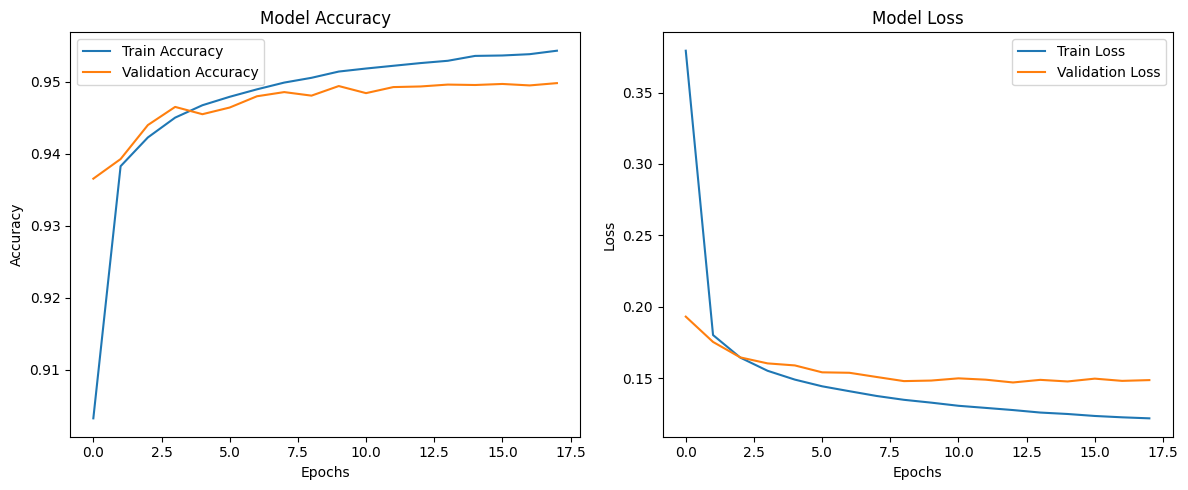

In [25]:
import matplotlib.pyplot as plt

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot accuracy on the first subplot
axes[0].plot(history.history['accuracy'], label='Train Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].legend()

# Plot loss on the second subplot
axes[1].plot(history.history['loss'], label='Train Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Model Loss')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
import os
NOTEBOOK_DIR = os.path.dirname(os.path.abspath(__file__))
MODEL_SAVE_PATH = os.path.join(NOTEBOOK_DIR, '..', 'model', 'model.keras')
model.save(MODEL_SAVE_PATH)

# Incorporating PCA to the Dataset

In [26]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_final)
# pca = PCA(n_components=0.80)
# X_pca = pca.fit_transform(X_scaled)

# X_train_pca, X_temp_pca, y_train, y_temp = train_test_split(X_pca, y_final, test_size=0.2, random_state=42)
# X_val_pca, X_test_pca, y_val, y_test = train_test_split(X_temp_pca, y_temp, test_size=0.5, random_state=42)

In [27]:
# # Convert back to TensorFlow Datasets
# train_dataset_pca = tf.data.Dataset.from_tensor_slices((X_train_pca, y_train))
# val_dataset_pca = tf.data.Dataset.from_tensor_slices((X_val_pca, y_val))
# test_dataset_pca = tf.data.Dataset.from_tensor_slices((X_test_pca, y_test))

# # Shuffle and batch the datasets
# batch_size = 32

# train_dataset_pca = train_dataset_pca.shuffle(buffer_size=1000).batch(batch_size)
# val_dataset_pca = val_dataset_pca.batch(batch_size)
# test_dataset_pca = test_dataset_pca.batch(batch_size)

In [28]:
# input_shape_pca = (X_pca.shape[1],)

# # Build the TensorFlow model
# model = Sequential([
#     Input(shape=input_shape_pca),
#     Dense(256, activation='relu'),
#     Dense(64, activation='relu'),
#     Dense(len(label_encoder.classes_), activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# history = model.fit(train_dataset_pca,
#                     validation_data=val_dataset_pca,
#                     epochs=100,
#                     callbacks=[early_stopping, custom_message_callback])

In [29]:
# # Evaluate on test data
# test_loss, test_accuracy = model.evaluate(test_dataset_pca)
# print(f"Test Accuracy: {test_accuracy:.4f}")

In [30]:
# import matplotlib.pyplot as plt

# # Create subplots side by side
# fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# # Plot accuracy on the first subplot
# axes[0].plot(history.history['accuracy'], label='Train Accuracy')
# axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
# axes[0].set_xlabel('Epochs')
# axes[0].set_ylabel('Accuracy')
# axes[0].set_title('Model Accuracy')
# axes[0].legend()

# # Plot loss on the second subplot
# axes[1].plot(history.history['loss'], label='Train Loss')
# axes[1].plot(history.history['val_loss'], label='Validation Loss')
# axes[1].set_xlabel('Epochs')
# axes[1].set_ylabel('Loss')
# axes[1].set_title('Model Loss')
# axes[1].legend()

# # Adjust layout
# plt.tight_layout()
# plt.show()


# Finding Optimal Learning Rate